In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Задание 4

Исходная функция

In [2]:
x = symbols('x', real = True)

In [3]:
f = pow(abs(tan(x)), x) * sin(x) + 1 / 2
f

sin(x)*Abs(tan(x))**x + 0.5

Граница отрезка

In [4]:
a = -2
b = 1

График исходной функции

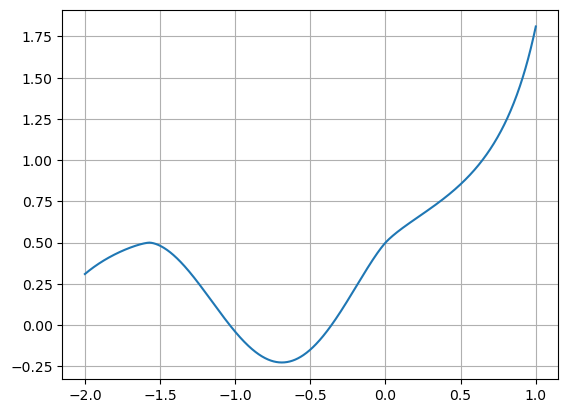

In [5]:
x_vals = np.linspace(a, b, 1000)
plot_f = lambdify(x, f, modules = 'numpy')
plt.plot(x_vals, plot_f(x_vals))
plt.grid(True)

Часть А. Тригонометрический базис

In [6]:
m = 12

Базис из тригонометрических функций

In [7]:
t = 2 * pi / (b - a) * x

basis = [1]

for k in range(1, m + 1):
    basis.append(cos(k * t))
    basis.append(sin(k * t))

Вектор коэффициентов

In [8]:
coeff_a = [0] * (2 * m  + 1)

coeff_a[0] = Integral(f * basis[0], (x, a, b)).as_sum(50).evalf() / (b - a)

for k in range(1, 2 * m + 1):
    coeff_a[k] = 2 * Integral(f * basis[k], (x, a, b)).as_sum(50).evalf() / (b - a)

Полученное приближение

In [9]:
g = np.dot(np.array(coeff_a), np.array(basis).transpose())
g

0.585389895802023*sin(2*pi*x/3) + 0.055865610875724*sin(4*pi*x/3) - 0.141828486180454*sin(2*pi*x) + 0.0716397134969681*sin(8*pi*x/3) + 0.0279523836073355*sin(10*pi*x/3) - 0.0765591775199415*sin(4*pi*x) + 0.0413132495603049*sin(14*pi*x/3) + 0.0228021316190748*sin(16*pi*x/3) - 0.0536986105872157*sin(6*pi*x) + 0.0282341867912777*sin(20*pi*x/3) + 0.0199756521090052*sin(22*pi*x/3) - 0.043282544109037*sin(8*pi*x) + 0.00878811024773231*cos(2*pi*x/3) - 0.0200110048493318*cos(4*pi*x/3) + 0.0413158435244009*cos(2*pi*x) + 0.0916213937876489*cos(8*pi*x/3) - 0.0836749303617592*cos(10*pi*x/3) + 0.0161746704005863*cos(4*pi*x) + 0.0531185633769729*cos(14*pi*x/3) - 0.0535102319004321*cos(16*pi*x/3) + 0.00584684610131076*cos(6*pi*x) + 0.0413399573962693*cos(20*pi*x/3) - 0.04146771449829*cos(22*pi*x/3) + 0.00344337003730429*cos(8*pi*x) + 0.424648798471563

График приближения и исходной функции

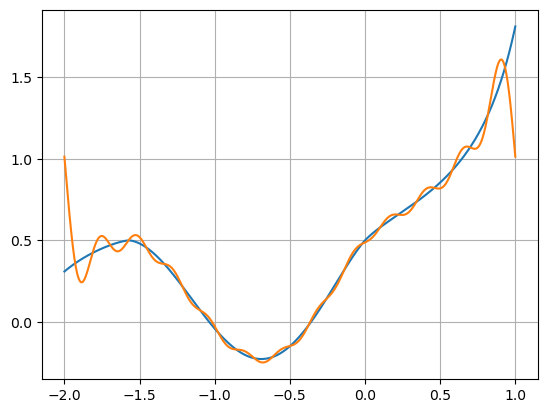

In [10]:
plot_g = lambdify(x, g, modules = 'numpy')
plt.plot(x_vals, plot_f(x_vals))
plt.plot(x_vals, plot_g(x_vals))
plt.grid(True)

Ошибка и её оценка

In [11]:
err = Integral((f - g) * (f - g), (x, a, b)).as_sum(50).evalf()
I = Integral(f, (x, a, b)).as_sum(50).evalf()
print('err:', err)
print('0.03 * int(f, x=a..b):', I * 0.03)

err: 0.0210583890649197
0.03 * int(f, x=a..b): 0.0382183918624407


Часть Б. Полиномы Чебышева

In [12]:
m = 8

Базис из полиномов Чебышева

In [13]:
basis = [1, x]

for k in range(2 , m):
    basis.append(expand(2 * x * basis[k - 1] - basis[k - 2]))

Матрица скалярных произведений базисных функций

In [14]:
F = np.zeros((m, m))
for i in range(m):
    for j in range(i, m):
        F[i][j] = Integral(basis[i] * basis[j], (x, a, b)).as_sum(50).evalf()
        F[j][i] = F[i][j]

In [15]:
y = np.zeros((m, 1))
for i in range(m):
    y[i][0] = Integral(basis[i] * f, (x, a, b)).as_sum(50).evalf()

Вектор коэффициентов

In [16]:
coeff_a = np.dot(np.linalg.inv(F), y)
g = np.dot(np.array(basis), coeff_a)[0]
g

-0.189400475630293*x**7 - 0.414394206218958*x**6 + 0.755640139424074*x**5 + 1.59765293479688*x**4 - 0.775465415510503*x**3 - 0.780923746813855*x**2 + 1.13434037448847*x + 0.466729263387915

График приближения и исходной функции

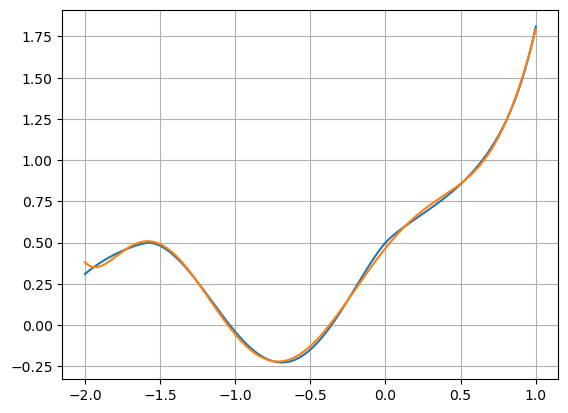

In [17]:
plot_g = lambdify(x, g, modules = 'numpy')
plt.plot(x_vals, plot_f(x_vals))
plt.plot(x_vals, plot_g(x_vals))
plt.grid(True)

Ошибка и её оценка

In [18]:
err = Integral((f - g) * (f - g), (x, a, b)).as_sum(50).evalf()
I = Integral(f, (x, a, b)).as_sum(50).evalf()
print('err:', err)
print('0.03 * int(f, x=a..b):', I * 0.03)

err: 0.000668694575475838
0.03 * int(f, x=a..b): 0.0382183918624407
